In [2]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import cv2 as cv

# Imagenes del objeto y la caja ha utilizar para la captura de imagenes

In [1]:
fig,fotos=plt.subplots(3,3, figsize=(10, 10))

f1 = imageio.imread("res/1.jpg")
f2 = imageio.imread("res/2.jpg")
f3 = imageio.imread("res/3.jpg")
f4 = imageio.imread("res/4.jpg")
f5 = imageio.imread("res/5.jpg")
f6 = imageio.imread("res/6.jpg")
f7 = imageio.imread("res/7.jpg")
f8 = imageio.imread("res/8.jpg")
f9 = imageio.imread("res/9.jpg")

fotos[0,0].imshow(f1)
fotos[1,0].imshow(f2)
fotos[2,0].imshow(f3)
fotos[0,1].imshow(f4)
fotos[1,1].imshow(f5)
fotos[2,1].imshow(f6)
fotos[0,2].imshow(f7)
fotos[1,2].imshow(f8)
fotos[2,2].imshow(f9)


NameError: name 'plt' is not defined

# Medidas del objeto a fotografiar

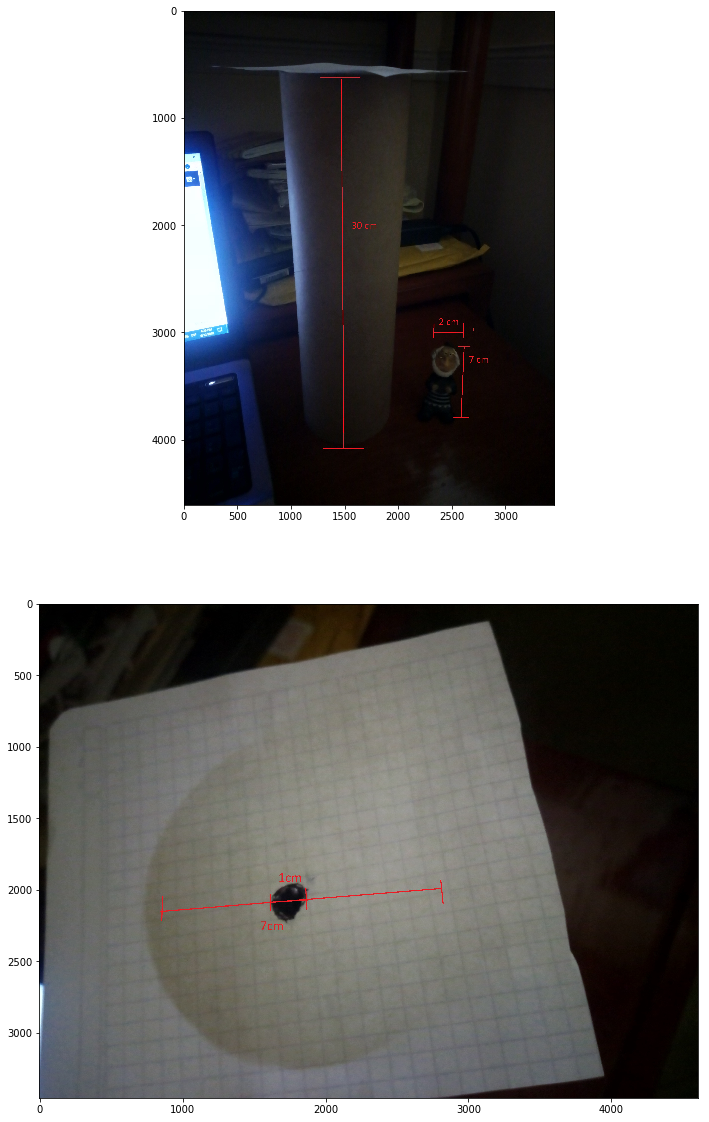

In [25]:

f10 = imageio.imread("res/10.jpg")
f11 = imageio.imread("res/11.jpg")

fig,medidas=plt.subplots(2,1, figsize=(20, 20))

medidas[0].imshow(f10)
medidas[1].imshow(f11)


# Especificaciones del telefono y la cámara

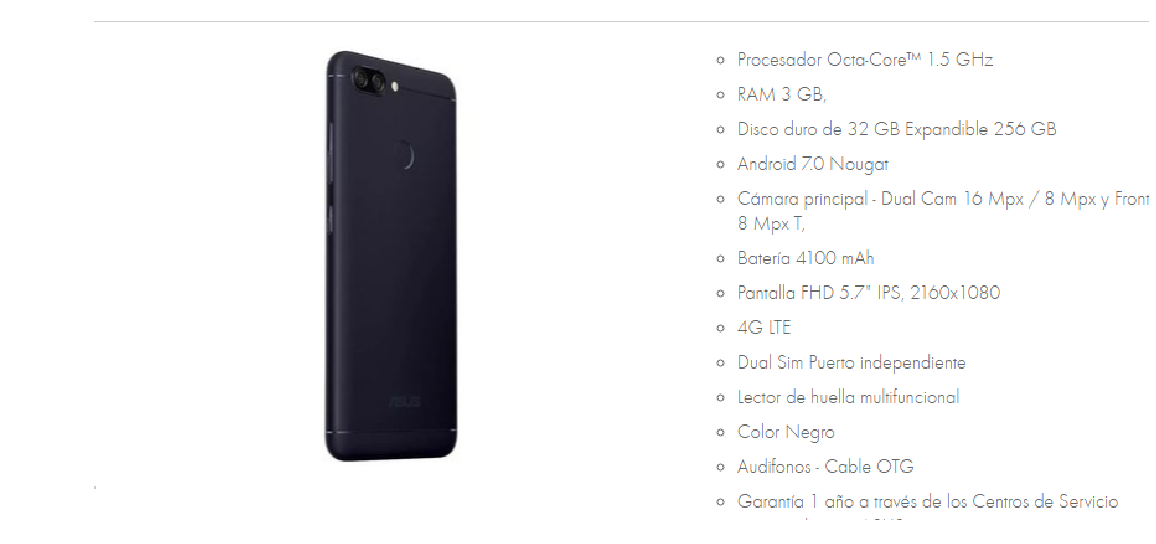

In [27]:
f12 = imageio.imread("res/12.png")
plt.figure(figsize=(20,20))
plt.imshow(f12)
plt.axis("off")
plt.show()

# Fotografía

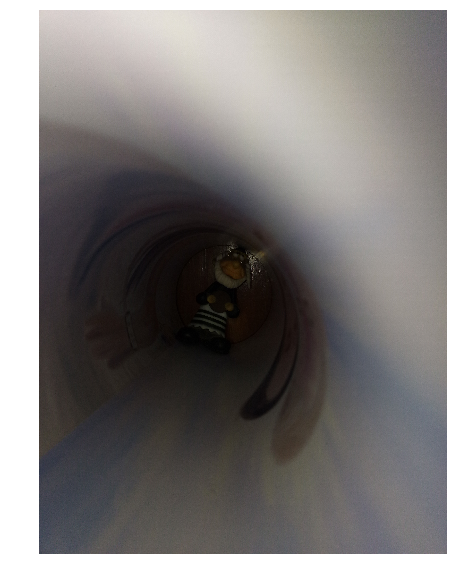

In [8]:
im = imageio.imread("res/caja2.jpg")
plt.figure(figsize=(10,10))
plt.imshow(im,cmap="gray")
plt.axis("off")
plt.show()

# Despues de muchos intentos fallidos encontramos que con la transfomación gamma los colores del muñeco resaltan mucho y las sombras tienden a desaparecer.

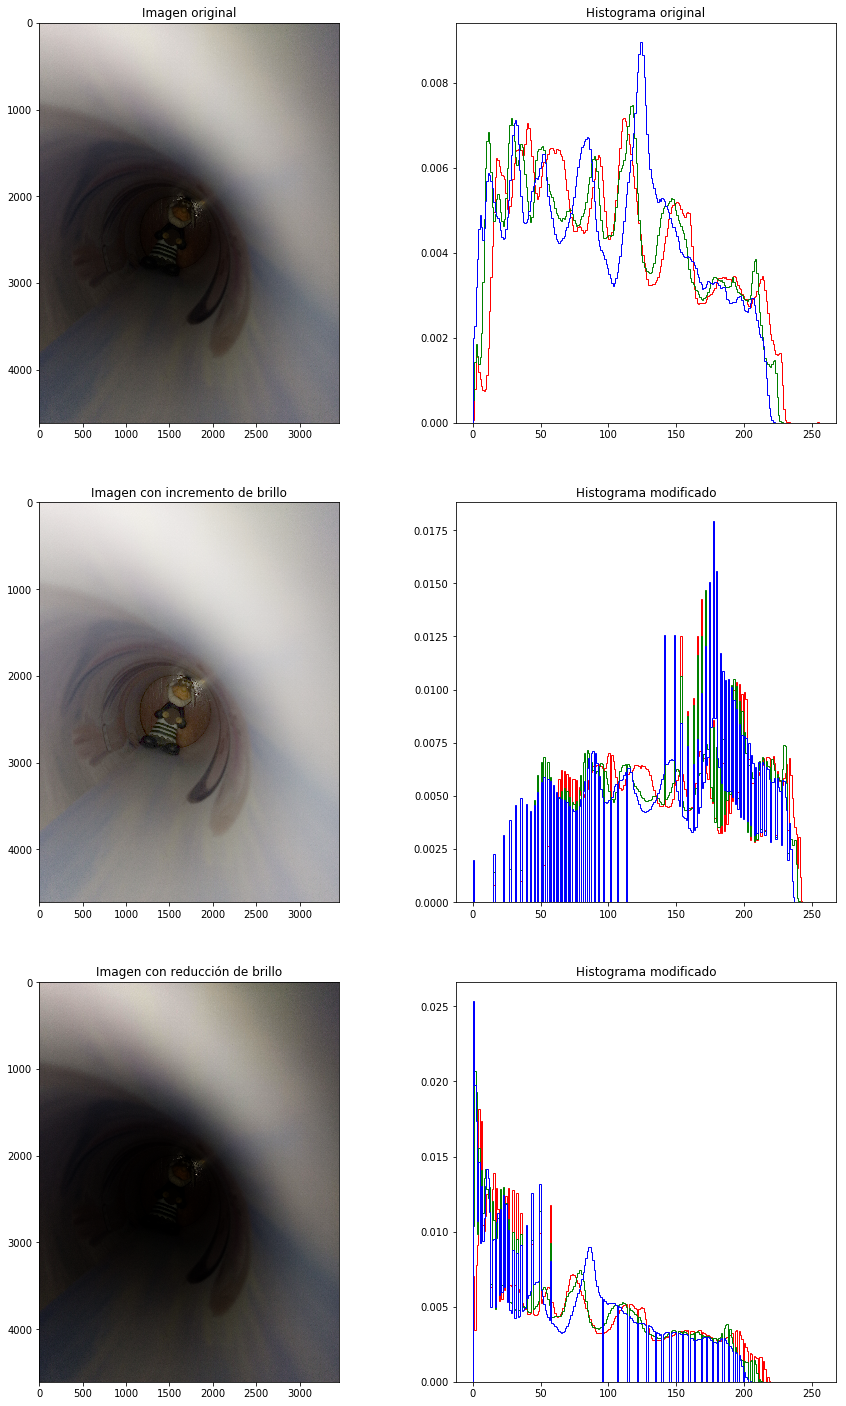

In [2]:
#Importar liberias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función de transformación de la imagen (corrección gamma)
def gamma_correction(img, a, gamma):
    
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función corrección gamma es de la forma ax^gamma, donde x es la imagen de entrada
    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)
    
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('res/caja2.jpg'), cv2.COLOR_BGR2RGB)

#Dar valor a los parámetros a,gamma (args)
a = 1
gamma = 0.5

#Aplicar la transformación corrección gamma sobre la imagen de entrada
res_brillante = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Variar los parámetros a y gamma y volver a aplicar la corrección
a = 1
gamma = 1.5

res_oscuro = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Generar un subplot 2x2 para contrastar imágen original con transformada y sus histogramas
fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 25))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen con incremento de brillo')
arreglo_plots[1,0].imshow(res_brillante, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_brillante[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
    
arreglo_plots[2,0].set_title('Imagen con reducción de brillo')
arreglo_plots[2,0].imshow(res_oscuro, cmap="gray")
arreglo_plots[2,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_oscuro[:,:,i].ravel()
    arreglo_plots[2,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])